In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import functools
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from datetime import datetime
import math

Using TensorFlow backend.


In [2]:
X = pd.read_csv("all_chars.csv",error_bad_lines=False)
print(X.shape)

(683464, 901)


In [3]:
df_unicode_to_char = pd.read_csv("https://raw.githubusercontent.com/deannacodes/kuzushiji_recognition/master/unicode_translation.csv",error_bad_lines=False)
dict_unicode_to_char = df_unicode_to_char.set_index('Unicode').T.to_dict('list')

In [4]:
y = X["character"]
X = X.drop(columns=["character"])

In [5]:
import math

unicode_to_int = {}
unicode_to_char = {}
count = 0
for unicode in df_unicode_to_char["Unicode"]:
    unicode_to_int[unicode] = count
    if unicode in dict_unicode_to_char:
        unicode_to_char[count] = dict_unicode_to_char[unicode][0]
    count += 1
    
y = y.map(unicode_to_int)  
y = y.to_numpy()
# Some values in the dataframe were showing as nan, so we have to get rid of them manually.
drops = []
for i in range(0,len(y)):
    if math.isnan(y[i]):
        drops.append(i)

y = np.delete(y,drops,0)
X = X.drop(drops)
X = X.to_numpy().astype('int')

label:  が


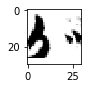

label:  思


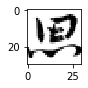

label:  次


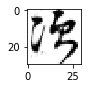

label:  へ


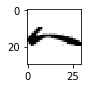

label:  の


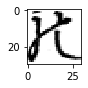

label:  ぶ


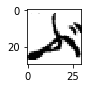

label:  々


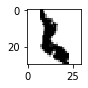

label:  は


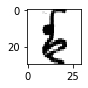

label:  ろ


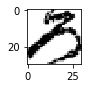

label:  先


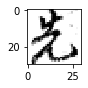

In [6]:
import matplotlib.pyplot as plt

%matplotlib inline

r = [n*100+1 for n in range(10)]
for i in r:
    image = X[i].reshape(30,30)
    plt.figure(figsize=(1,1))
    plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
    print("label: ", unicode_to_char[y[i]])
    plt.show()


In [7]:
X = X.reshape(X.shape[0], 30,30,1)
X = X.astype('float32')
X /= 255
y = np_utils.to_categorical(y, len(unicode_to_int))

print(X.shape)
print(y.shape)

(683442, 30, 30, 1)
(683442, 4781)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [17]:
input_size = 900
out_size = len(unicode_to_int)

model = Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(30,30,1)))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) 
model.add(Flatten())
model.add(Dense(5000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(out_size, activation='softmax'))

In [18]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],
              optimizer='adam')

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 5000)              27045000  
_________________________________________________________________
dropout_8 (Dropout)          (None, 5000)             

In [20]:
fitted_model = model.fit(X_train, y_train, batch_size=100, epochs=5, verbose=1)

Epoch 1/5
512581/512581 [==============================] - 5068s 10ms/step - loss: 1.7043 - accuracy: 0.7194
Epoch 2/5
512581/512581 [==============================] - 5482s 11ms/step - loss: 0.9280 - accuracy: 0.8307
Epoch 3/5
512581/512581 [==============================] - 4928s 10ms/step - loss: 0.6591 - accuracy: 0.8702
Epoch 4/5
512581/512581 [==============================] - 5355s 10ms/step - loss: 0.4923 - accuracy: 0.8955
Epoch 5/5
512581/512581 [==============================] - 5351s 10ms/step - loss: 0.3788 - accuracy: 0.9138


In [33]:
fitted_model = model.fit(X_train, y_train, batch_size=100, epochs=1, verbose=1)

Epoch 1/1
512581/512581 [==============================] - 5500s 11ms/step - loss: 0.2940 - accuracy: 0.9283


In [34]:
import joblib   

joblib.dump(model, 'kuzushiji_model_cnn_6epoch.pkl')   

# model_from_file = joblib.load('kuzushiji_model.pkl')  

['kuzushiji_model_cnn_6epoch.pkl']

In [35]:
y_predict = model.predict_classes(X_test, verbose=0)
score = model.evaluate(X_test, y_test, verbose=1)
print('The accuracy is: ', score[1])

170861/170861 [==============================] - 348s 2ms/step
The accuracy is:  0.9132745265960693


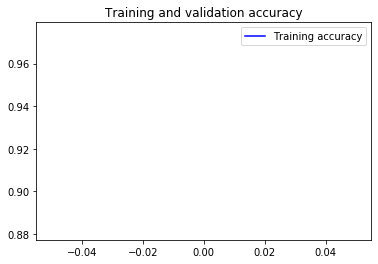

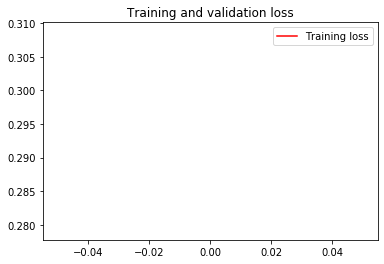

In [38]:
import matplotlib.pyplot as plt

%matplotlib inline

accuracy = fitted_model.history['accuracy']
loss = fitted_model.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b-', label='Training accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r-', label='Training loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

(1, 3667, 3670)
predicted:  術 actual:  衝


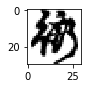

(6, 642, 168)
predicted:  十 actual:  ナ


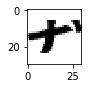

(7, 146, 203)
predicted:  コ actual:  ヱ


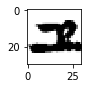

(16, 1559, 1556)
predicted:  成 actual:  戊


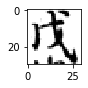

(30, 4310, 2264)
predicted:  階 actual:  浮


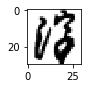

(40, 3956, 4084)
predicted:  跡 actual:  道


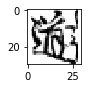

(51, 107, 2261)
predicted:  ま actual:  浦


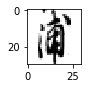

(53, 93, 65)
predicted:  ば actual:  ご


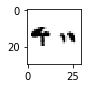

(55, 1949, 2286)
predicted:  染 actual:  深


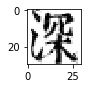

(56, 120, 92)
predicted:  る actual:  は


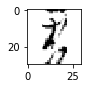

(59, 4055, 4052)
predicted:  逆 actual:  送


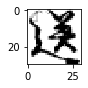

(68, 2983, 3418)
predicted:  米 actual:  菰


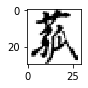

(70, 119, 81)
predicted:  り actual:  つ


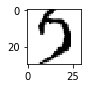

(83, 642, 168)
predicted:  十 actual:  ナ


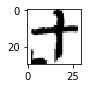

(91, 1562, 1349)
predicted:  或 actual:  式


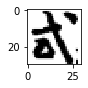

(92, 3074, 4677)
predicted:  綿 actual:  鶉


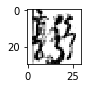

(97, 2593, 2478)
predicted:  用 actual:  牆


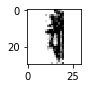

(107, 3735, 3100)
predicted:  見 actual:  縫


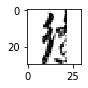

(131, 66, 64)
predicted:  さ actual:  こ


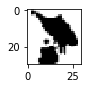

(163, 171, 1083)
predicted:  ネ actual:  子


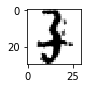

(181, 1173, 88)
predicted:  小 actual:  に


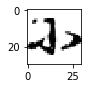

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

mistakes = []
for i in range(len(y_predict)):
    max_a = 0
    for j in range(len(unicode_to_int)):
        if y_test[i][max_a] < y_test[i][j]:
            max_a = j
    if y_predict[i] != max_a:
        mistakes.append((i,y_predict[i],max_a))
    if len(mistakes) > 20:
        break;

for m in mistakes:
    (mistake, predicted, actual) = m
    print(m)
    print("predicted: ", unicode_to_char[predicted], "actual: ", unicode_to_char[actual])
    image = X_test[mistake].reshape(30,30)
    plt.figure(figsize=(1,1))
    plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
    plt.show()    
    j += 1
